# Collaboration and Competition

---

In this notebook, DDPG multi-agents are trained on Tennis environment.

In [1]:
%matplotlib inline 
import numpy as np
import os

from matplotlib import pyplot as plt
from unityagents import UnityEnvironment
from collections import deque

In [3]:
from ddpg_agent import Agent, ReplayBuffer
from train_agent_ import train_agent
from infer_agent import infer_agent

### 1. Loading environment

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [4]:
env = UnityEnvironment(file_name="Tennis.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Algorithms

In this project, DDPG(Deep Deterministic Policy Gradients) is modified to apply for multi agents task.

#### Motivation
DDPG is working quite well on continuous action space such as Reacher environment. The significant difference from Reacher environment to Tennis environment is the number of agents. While Reacher environment provides an observation for a single agent, Tennis environment provides an observation for two each agents. Thus, in this project, DDPG is modified to apply for multi agents environment.

### 4. Hyper parameters to configure

* RANDOM_SEED : random seed
* BUFFER_SIZE : replay buffer size
* BATCH_SIZE : minibatch size
* GAMMA : discount factor
* TAU : for soft update of target parameters
* LR_ACTOR : learning rate of the actor
* LR_CRITIC : learning rate of the critic
* EIGHT_DECAY : L2 weight decay
* NUM_EPISODES : number of episodes to train
* MAX_T : maximum number of iterations to train per episode
* SUCCESS_SCORE : success score

In [7]:
RANDOM_SEED = 0
BUFFER_SIZE = int(1e6)  
BATCH_SIZE = 128        
GAMMA = 0.999            
TAU = 1e-3              
LR_ACTOR = 1e-4         
LR_CRITIC = 1e-4        
WEIGHT_DECAY = 0.0001        
NUM_EPISODES = 1000     
MAX_T = 100            
SUCCESS_SCORE = 0.5      

### 5. Train agents

In [8]:
memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, RANDOM_SEED)

In [9]:
agent = Agent(state_size, action_size, memory, random_seed=RANDOM_SEED, buffer_size=BUFFER_SIZE, batch_size=BATCH_SIZE, gamma=GAMMA, tau=TAU, lr_actor=LR_ACTOR, lr_critic=LR_CRITIC, weight_decay=WEIGHT_DECAY)

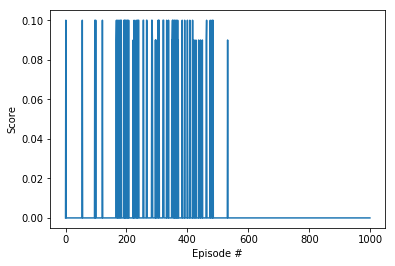

In [10]:
scores = None
scores = train_agent(env, agent, brain_name, n_episodes=NUM_EPISODES, success_score=SUCCESS_SCORE, list_scores=scores)
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 6. Infer agents

In [ ]:
tag = 'success'
model_path = 'models/{0}_{1}.pth'
actor1_model_path = model_path.format('actor1', tag)
critic1_model_path = model_path.format('critic1', tag)
actor2_model_path = model_path.format('actor2', tag)
critic2_model_path = model_path.format('critic2', tag)
memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, RANDOM_SEED)

if os.path.isfile(actor_model_path) & os.path.isfile(critic_model_path):
    agent1.load_actor(actor1_model_path)
    agent1.load_critic(critic1_model_path)
    agent2.load_actor(actor2_model_path)
    agent2.load_critic(critic2_model_path)
    print('Complete to load models from {0} | {1}'.format(actor_model_path, critic_model_path))

In [ ]:
scores = infer_agent(env, agent1, agent2, memory, brain_name, n_episodes=100)
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 7. Future works

Current agent fail to solve the task. It seems that agents cannot learn policy and value network properly from experiences. As first future work hyper parameter tuning is planned. Besides for second future work, Actor-Critic algorithm such as A3C, A2C is another approach in future. 

In [10]:
env.close()